# **Data Wrangling and Analyzing Twitter Data Project**

## 1. Import Libraries

In [7]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tweepy
import os
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## 2. Gather Data

### 2.1 Gather Downloaded Data

In [8]:
# After the data had been downloaded from the provided link its stored in a dataframe
twitter_download = pd.read_csv('twitter-archive-enhanced.csv')


### 2.2 Gather Data from URL 

In [9]:
# Second dataframe is downloaded programmatically using the url provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,'wb') as file :
        file.write(response.content)
        
image_data = pd.read_csv(file_name ,sep= '\t')

### 2.3 Gather Data from API

In [10]:
consumer_key = 'FjNbxqkxgIE5wEojbVbRBim33'
consumer_secret = 'un34601fIilFd4wrNwGgzqZaucHNik5FhvFDGJScVlHuNGAH92'
access_token = '1348987927188156417-LJSjm2c2LWESNNnO2PAzMUF2aeeZmz'
access_secret = '0oyxoZOz2loGam5TRr0FYgga4aJKQoI9eX3kz9lrWkelx'
# To access API and use token 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# Test the api
exp_tweet = api.get_status(twitter_download.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content


{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [7]:
# Loop over all tweet_ids and extract data for each one
file_name_json = 'tweet_json.txt'
error = []
if not os.path.isfile(file_name_json):
    with open(file_name_json,'w') as file_json :
        for id_ in twitter_download['tweet_id']:
            try:
                status = api.get_status(id_ , tweet_mode = 'extended')
                content = status._json
                json.dump(content,file_json)
                file_json.write('\n')
            except:
                print('Error found for id {}'.format(id_))
                error.append(id_)
            
            
            
          
            

In [12]:
# Navigate through tweet_json.txt and save it to a dictionary 
json_dic = []
with open(file_name_json,'r') as file_json2 :
    for line in file_json2:
        tweet = json.loads(line)
        json_dic.append({'tweet_id' : tweet['id']
                     ,'full_text': tweet['full_text']
                     ,'favourite_count' :tweet['favorite_count']
                     ,'retweet_count': tweet['retweet_count']
                     })

# Transform the dictionary into a data frame
json_df = pd.DataFrame(json_dic)

## 3. Assess

### 3.1 Visual Assessment

In [104]:
twitter_download.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [110]:
json_df.head()

,favourite_count,full_text,retweet_count,tweet_id
0,35180,This is Phineas. He's a mystical boy. Only eve...,7429,892420643555336193
1,30449,This is Tilly. She's just checking pup on you....,5522,892177421306343426
2,22891,This is Archie. He is a rare Norwegian Pouncin...,3646,891815181378084864
3,38472,This is Darla. She commenced a snooze mid meal...,7599,891689557279858688
4,36739,This is Franklin. He would like you to stop ca...,8183,891327558926688256


In [109]:
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.2 Programmatic Assessment

In [111]:
twitter_download.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [121]:
# Checking timestamp datatype
type(twitter_download['timestamp'][0])


str

In [122]:
twitter_download.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [124]:
twitter_download['rating_numerator'].sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [51]:
twitter_download['tweet_id'].duplicated().sum()

0

In [ ]:
json_df.head()

In [128]:
twitter_download[twitter_download['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [129]:
twitter_download[twitter_download['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [130]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [132]:
image_data.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [133]:
json_df.describe()

,favourite_count,retweet_count,tweet_id
count,2331.000000,2331.000000,2.331000e+03
mean,7349.104247,2609.088374,7.419079e+17
std,11415.025899,4414.329997,6.823170e+16
min,0.000000,1.000000,6.660209e+17
25%,1276.500000,529.000000,6.782670e+17
50%,3191.000000,1219.000000,7.182469e+17
75%,8993.500000,3029.000000,7.986692e+17
max,151451.000000,74964.000000,8.924206e+17


In [134]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favourite_count    2331 non-null int64
full_text          2331 non-null object
retweet_count      2331 non-null int64
tweet_id           2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


### 3.3 Data Quality Issues

#### Twitter_Download

1. Unneeded columns ('retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_timestamp') 
2. timestamp data type should be date and found string (Validity)
3. rating_denominator data entered wrongly (Accuracy)
4. rating_numerator data entered wrongly (Accuracy)
5. Some records are retweets (Accuracy)
6. Inconsistent format in name column
7. Some names are wrongly extracted like (A , The ) (Accuracy)

#### Image_data

1. Some data doesnt have images rows should be 2356 found 2075 (Misssing Data)
2. Some images arent for dogs (Accuracy)
3. Inconsistnet format for P1,P2,P3 should all be lower or upper case (3 quality issues)
4. Non descriptive column names

#### Json_df

1.Some data are missing should be 2356 found 2331

### 3.4 Tidiness Issues

#### Twitter_Download

1. Dogga,floofer,pupper,puppo should be in one coloumn called type

#### Image_data

1. Predictions (Only dog photos ) should be in one column for better analysis

#### Json_df

1. Json_df and twitter_download should be one data frame


## 4. Clean

In [243]:
# Before cleaning a copy of the data frames are created
json_clean = json_df.copy()
image_clean = image_data.copy()
download_clean = twitter_download.copy()

### 4.1 Dealing with Quality Issues

#### 4.1.1 Define 

1. Joining image and download to find records with missing images and delete them
2. Remove Retweets and replies by droping those records
3. Remove unneeded columns mentioned above
4. Change timestamp to date datatype
5. Drop all tweets that doesnt include dogs 
6. Correct wrong rating_denominator values
7. Correct wrong rating_numerator values
8. Change non_descriptive image_clean column names 
9. Standardize the Prediction columns to be all capitalized
10. Standardize the Name column to be all capitalized
11. Correct Wrong names 'a' and 'the'

#### 4.1.2 Code

In [244]:
merged_df = pd.merge(download_clean,image_clean, on = ['tweet_id'], how='left')

In [245]:
download_clean = merged_df

In [246]:
# drop values with missing images
download_clean = download_clean.drop(download_clean[download_clean.jpg_url.isnull()].index)

In [247]:
# drop retweets 
download_clean = download_clean[download_clean.retweeted_status_id.isnull()]


In [248]:
# drop replies
download_clean = download_clean[download_clean.in_reply_to_status_id.isnull()]

In [249]:
# drop unneeded columns
download_clean = download_clean.drop(columns =['retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_timestamp' ],axis=1 )

In [250]:
# change timestamp column 
download_clean.timestamp = pd.to_datetime(download_clean.timestamp)

In [251]:
# Remove records that arent dog images
download_clean = download_clean.drop(download_clean[(download_clean.p1_dog ==False) & (download_clean.p2_dog == False) & (download_clean.p3_dog == False)].index)

In [252]:
# seprate again download_clean and image_clean
download_clean = download_clean.drop(columns = ['jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

In [253]:
# Correct wrong rating_denominator "<10"
# First check the records after the previous droping process
download_clean[download_clean.rating_denominator <10]
# The first row doesnt have rating and the second should be 9 /10 after comparing it to the text

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [254]:
# Replace values
download_clean.loc[516,'rating_numerator'] = 0
download_clean.loc[516,'rating_denominator'] = 0
download_clean.loc[2335,'rating_numerator'] = 9
download_clean.loc[2335,'rating_denominator'] = 10

In [255]:
# Correct wrong rating_denominator "<10"
# Check the records after the previous droping process
download_clean[download_clean.rating_denominator > 10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


1. If the rating_denominator values are divisible by 10 then divide them with the first 2 digits (Because the photos contain more than one dog)
2. If the rating_denominator values are not divisible by 10  replace it with correct values

In [256]:
# Correct rating_denominator values are not divisible by 10 after reviewing the text
download_clean.loc[1662,'rating_numerator'] = 10
download_clean.loc[1662,'rating_denominator'] = 10
download_clean.loc[1068,'rating_numerator'] = 14
download_clean.loc[1068,'rating_denominator'] = 10

In [257]:
for ind in download_clean[download_clean.rating_denominator > 10].index:
     division = download_clean['rating_denominator'][ind].astype(str)
     division = int(division[:-1])
     download_clean['rating_denominator'][ind] /= division
     download_clean['rating_numerator'][ind] /= division

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [258]:
# Fix rating_numerator 
# Checking the extreme values of rating_numerator ">14"
download_clean[download_clean.rating_numerator >14]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [259]:
# Fix the extreme values of rating_numerator ">14"
download_clean.loc[695,'rating_numerator'] = 9.75
download_clean.loc[763,'rating_numerator'] = 11.27
download_clean.loc[1712,'rating_numerator'] = 11.26

In [260]:
# Change imag_clean non descriptive column names
image_clean.columns = ['tweet_id','jpg_url',
 'img_num','first_prediction','first_prediction_confidence','first_dog_photo'
    ,'second_prediction','second_prediction_confidence','second_dog_photo'
    ,'third_prediction','third_prediction_confidence','third_dog_photo']


In [261]:
# Change all First,Second and third predictions to be lower case except first letter
image_clean['first_prediction'] = image_clean['first_prediction'].str.title()

In [262]:
# Change name in download_clean to be all capitalized
download_clean['name'] =  download_clean['name'] .str.title()

In [263]:
# Check all names and change the mistakes with highest rate because it will affect the analysis 
download_clean['name'].value_counts()[download_clean['name'].value_counts() > 1]

None        400
A            46
Charlie      10
Lucy         10
Cooper       10
Oliver        9
Tucker        9
Penny         8
Daisy         7
The           7
Sadie         7
Winston       7
Koda          6
Toby          6
Lola          6
Jax           6
Oscar         5
Stanley       5
Bo            5
Leo           5
Rusty         5
Bella         5
Chester       4
Finn          4
George        4
Reggie        4
Jack          4
Brody         4
Oakley        4
Duke          4
           ... 
Franklin      2
Chuckles      2
Flávio        2
Ted           2
Finley        2
Samson        2
Sunny         2
Rory          2
Watson        2
Abby          2
Theodore      2
Gerald        2
Derek         2
Griffin       2
Sarge         2
Calbert       2
Bisquick      2
Doc           2
Maximus       2
Moose         2
Romeo         2
Raymond       2
Django        2
Luca          2
Lorenzo       2
Kreg          2
Solomon       2
Coco          2
Gabe          2
Axel          2
Name: name, Length: 192,

In [264]:
# Remove 'a' and 'the' because the names arent mentioned in the tweets
download_clean['name'] = download_clean['name'].str.replace(r'A$','None')
download_clean['name'][download_clean['name'] == 'The' ] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 4.1.3 Test

In [265]:
download_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 11 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 236.2+ KB


In [266]:
download_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None


In [267]:
# Checking name column
download_clean['name'][download_clean['name'] == 'The' ]

Series([], Name: name, dtype: object)

In [268]:
# Checking rating_numerator  
download_clean[download_clean.rating_numerator >14]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [269]:
# Cheking rating_denominator 
download_clean[download_clean.rating_denominator  > 10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [270]:
# Checking Image_Clean
image_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_prediction_confidence,first_dog_photo,second_prediction,second_prediction_confidence,second_dog_photo,third_prediction,third_prediction_confidence,third_dog_photo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 4.2 Dealing with Tidiness Issues

#### 4.2.1 Define

1. Merge Dogga,floofer,pupper,puppo should be in one coloumn called type
2. Merge Predictions to be in one column called breed 
3. Merge both json_clean and download_clean in one dataframe


#### 4.2.2 Code

In [271]:
# Merge Dogga,floofer,pupper,puppo should be in one coloumn called type
concat = download_clean.copy()
concat = concat.replace('None',"")
concat['type'] = concat['doggo'] + concat['floofer'] + concat['pupper'] +concat['puppo'] 
unneed_columns = ['doggo','floofer','pupper','puppo']
concat = concat.drop(unneed_columns,axis=1)
download_clean= concat

In [272]:
# Create breed column according to predictions 
image_clean['breed'] = ""
for ind in image_clean.index:
    if image_clean['first_dog_photo'][ind] == True:
        image_clean['breed'][ind] = image_clean['first_prediction'][ind]
    elif image_clean['second_dog_photo'][ind] == True:
        image_clean['breed'][ind] = image_clean['second_prediction'][ind]
    else:
        image_clean['breed'][ind] = image_clean['third_prediction'][ind]

        


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [273]:
# Merge json clean and download_clean in one data frame
df_clean = pd.merge(download_clean,json_clean, on = ['tweet_id'] ,how = 'left')
df_clean = df_clean.drop('full_text',axis=1)

#### 4.2.3 Test

In [274]:
df_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,type,favourite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,30449.0,5522.0
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,22891.0,3646.0
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,38472.0,7599.0
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,36739.0,8183.0
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,,,18517.0,2743.0


In [275]:
image_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_prediction_confidence,first_dog_photo,second_prediction,second_prediction_confidence,second_dog_photo,third_prediction,third_prediction_confidence,third_dog_photo,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature_Pinscher


## 5. Final Assessment

### 5.1 Assess

In [276]:
df_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,type,favourite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,30449.0,5522.0
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,22891.0,3646.0
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,38472.0,7599.0
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,36739.0,8183.0
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,,,18517.0,2743.0


In [277]:
image_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_prediction_confidence,first_dog_photo,second_prediction,second_prediction_confidence,second_dog_photo,third_prediction,third_prediction_confidence,third_dog_photo,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature_Pinscher


### 5.2 Other Issues found


1. images that arent dogs are still in image_clean df
2. Inconsistent breed format should be all capitalized

### 5.3 Clean

In [278]:
# Remove All Triple false predictions 
image_clean = image_clean[~((image_clean['first_dog_photo'] == False) & (image_clean['second_dog_photo'] == False) & (image_clean['third_dog_photo'] == False))]
# Remove unneeded columns
columns_needed = ['tweet_id','jpg_url','img_num','breed']
image_clean = image_clean[columns_needed]

In [279]:
# Capitalize breed format in image_clean
image_clean['breed'] = image_clean['breed'].str.title()

### 5.4 Test

In [280]:
image_clean.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher


## 6. Storing Data

In [281]:
file_name = 'twitter_archive_master.csv'
df_clean.to_csv(file_name)
    

In [285]:
file_name_2 = 'twitter_image_cleaned.csv'
image_clean.to_csv(file_name_2)
    

## 7.Visualization

In [286]:
# Create dataframe joining both data frames
data_visual = pd.merge(df_clean,image_clean,on=['tweet_id'],how='left')

In [287]:
data_visual.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,type,favourite_count,retweet_count,jpg_url,img_num,breed
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,30449.0,5522.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,22891.0,3646.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,38472.0,7599.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_Retriever
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,36739.0,8183.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,,,18517.0,2743.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_Retriever


In [306]:
visual_1 = data_visual.groupby('breed')['favourite_count'].mean()
visual_1.nlargest(10)

breed
Bedlington_Terrier         22484.166667
Saluki                     21644.000000
French_Bulldog             18253.800000
Bouvier_Des_Flandres       16022.000000
Afghan_Hound               15325.333333
Black-And-Tan_Coonhound    15240.500000
Flat-Coated_Retriever      15085.875000
Irish_Water_Spaniel        14559.000000
Leonberg                   13201.333333
Whippet                    13134.454545
Name: favourite_count, dtype: float64

Text(0,0.5,'')

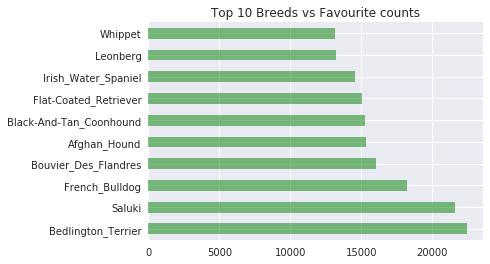

In [323]:
chart1 = visual_1.nlargest(10).plot(kind = 'barh',title = 'Top 10 Breeds vs Favourite counts' ,color ='green',alpha=.5)
chart1.set_ylabel("")

Text(0,0.5,'')

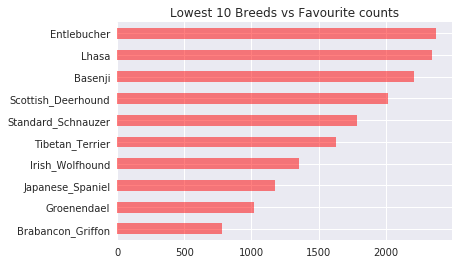

In [324]:
chart2 = visual_1.nsmallest(10).plot(kind = 'barh',title = 'Lowest 10 Breeds vs Favourite counts' ,color ='red',alpha=.5)
chart2.set_ylabel("")

In [325]:
visual_2 = data_visual.groupby('breed')['retweet_count'].mean()
visual_2.nlargest(10)

breed
Bedlington_Terrier    7065.166667
Afghan_Hound          5035.000000
Standard_Poodle       4718.000000
French_Bulldog        4645.833333
English_Springer      4631.400000
Saluki                4356.750000
Whippet               4337.363636
Cocker_Spaniel        4179.133333
Eskimo_Dog            4093.545455
Samoyed               4005.560976
Name: retweet_count, dtype: float64

Text(0,0.5,'')

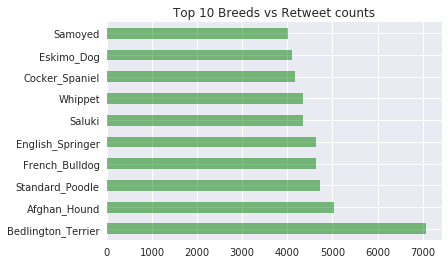

In [327]:
chart3 = visual_2.nlargest(10).plot(kind = 'barh',title = 'Top 10 Breeds vs Retweet counts' ,color ='green',alpha=.5)
chart3.set_ylabel("")

Text(0,0.5,'')

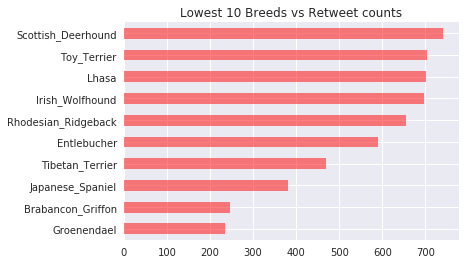

In [329]:
chart3 = visual_2.nsmallest(10).plot(kind = 'barh',title = 'Lowest 10 Breeds vs Retweet counts' ,color ='red',alpha=.5)
chart3.set_ylabel("")

In [358]:
visual_3 = data_visual[['breed','rating_numerator']]


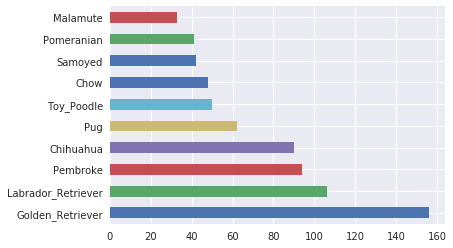

In [359]:
visual_3.breed.value_counts().nlargest(10).plot(kind='barh')

In [381]:
visual_4 = data_visual[['type','rating_numerator']]
visual_4_pivot = visual_4[visual_4['type'].isin(['doggo','puppo','pupper','floofer'])].pivot(columns ='type',values='rating_numerator')

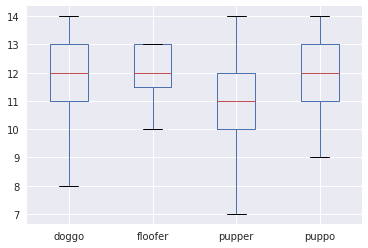

In [383]:
visual_4_pivot.plot(kind='box')